Import Packages

In [50]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(12, 8)

Create a DataFrame using Pandas of the bike data

In [52]:
data = pd.read_csv("C:/Users/Tyler/Documents/Python Projects/Linear Regression with NumPy and Python/bike_sharing_data.txt")
data.head()

# population --> is in the units of 10k. For example 6.1101 = 61,101 individuals in the city
# profit --> is in the units of $10k. For example 17.5920 = $175,920 profit

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [53]:
data.info()

# output --> we have data for 97 cities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Visualize the DataFrame

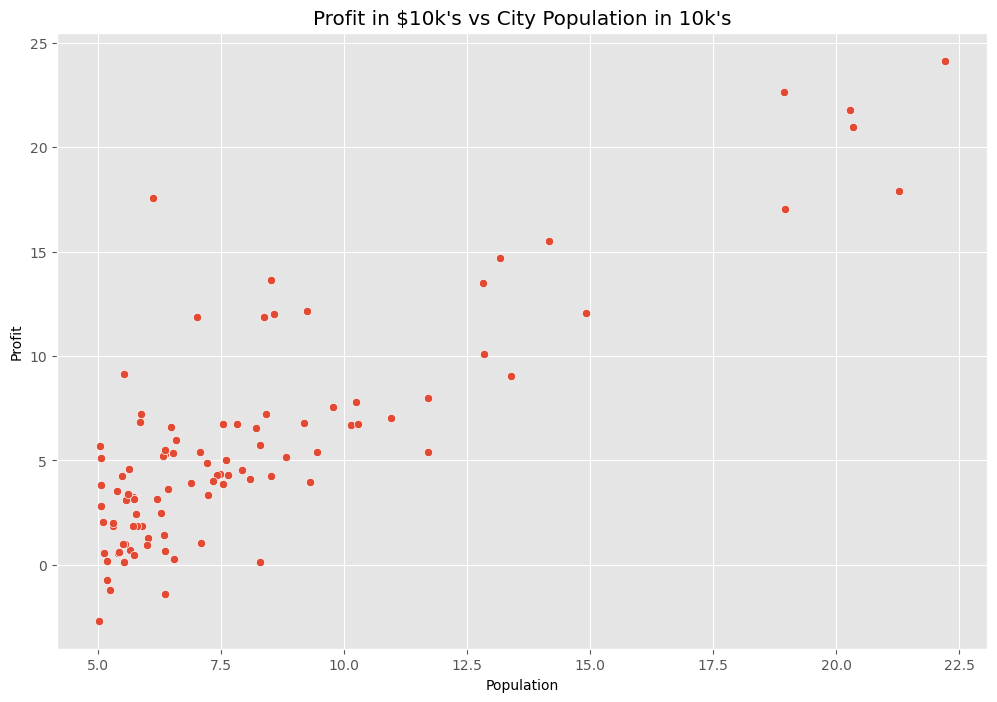

In [54]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10k\'s vs City Population in 10k\'s");

Information on the cost function

- the objective of linear regression is to minimize the 'cost function' --> J(θ) (below)
- think of the 'cost' of the error your model made in estimating the value
    - in our case, profit
- the J() formula
    - y(i) is the ith training example
    - hθ(x(i))is the models estimate of the true profit
    - overall you are taking the estimate minus the actual we have in our data
    - we then square the difference so the model is robust to outliers
    - we do this process for all 'm' for our training data and sum them
    - m = the summation of the square errors (hθ(x(i) - y(i))^2
    - we then normalize 'm' by doing the following calc --> 1/2m --> J(θ)

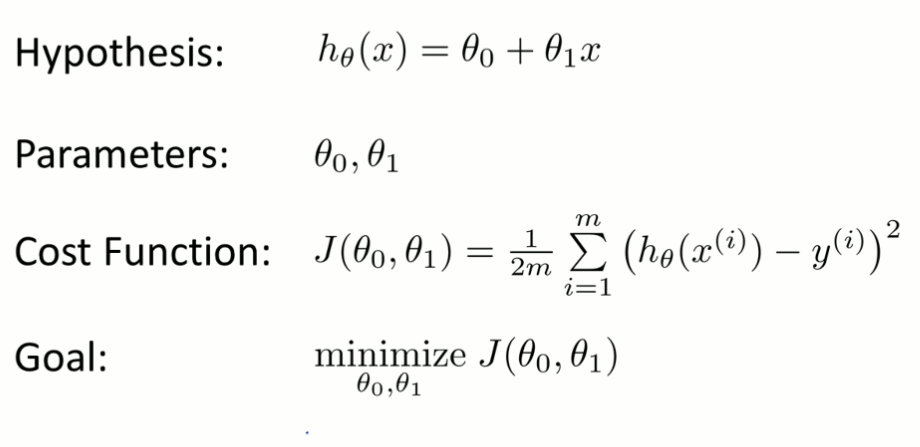

Compute the Cost J(θ)

In [55]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) **2

    return 1 / (2 * m) * np.sum(error)

# X and y represent matrices that represent rows from the training set; they are not scalar values
    # scalar value --> value that only has one component to it, the magnitude. For example; your height
    # matrix / matrices --> two dimensional data structure where numbers are arranged in rows and columns

Gradient descent learns to minimize the cost function, J(θ), as we perform gradient descent, it is helpful to monitor the convergence -- by computing the cost at each step

Assign values to m, X, y, and theta

In [56]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

Test the cost_function

In [57]:
cost_function(X, y, theta)

# output --> this is the cost J(θ)

32.072733877455676

Gradient Descent

Minimize the cost function J(θ) by updating the below equation and repeat until convergence. We will be using batch gradient descent

With each step of gradient descent, the parameters θj (theta sub j) come closer to the optimal values that will achieve the lowest cost J(θ)

alpha: gradient descent steps down the cost function in the direction of the steepest descent; and the size of each step is governed by the parameter alpha; otherwise known as the 'learning rate'

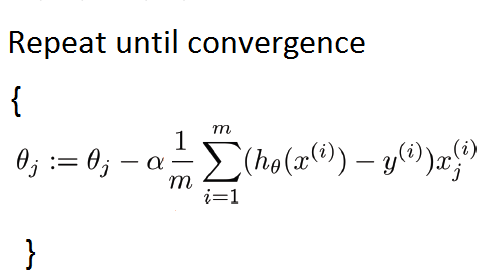

In [58]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1 / m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

As your gradient descent algorithm iterates, you should see J(θ) decrease and converge. Convergence occurs when the value starts to become constant

Call the gradient descent function with a learning rate of 0.01 with 2,000 iterations

In [59]:
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                               str(round(theta[1, 0], 2))))

# output --> intercept term (θ0)(theta zero) is -3.79; our coeffient of our feature is 1.18 (θ1)(theta one)

h(x) = -3.79 + 1.18x1


Visualize the Cost Function J(θ)

In [64]:
from mpl_toolkits.mplot3d import Axes3D

First, lets create theta_0 and theta_1

In [66]:
theta_0 = np.linspace(-10, 10, 100) # (start, stop, number of samples to generate)

theta_1 = np.linspace(-1, 4, 100)

# linspace in NumPy returns evenly spaced numbers over a specified interval

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

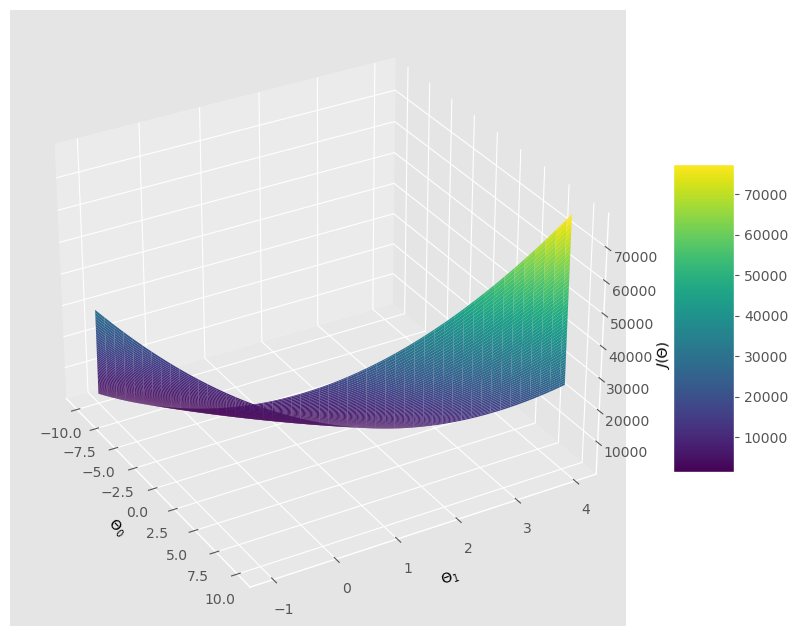

In [67]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show()

# output --> shows the gradient descent and the changes in J(θ) with the changes in θ0 (theta zero) & θ1 (theta one)

    # the global minimum, is the optimal values for θ0 & θ1; this is the darkest shade of purple on the graph
        # which is θ0 ~-5, θ1 ~ 0.9 
        
    # where each iteration of gradient descent moves closer to this point

Plot the Convergence

- plotting J(θ) against the number of iterations of gradient descent

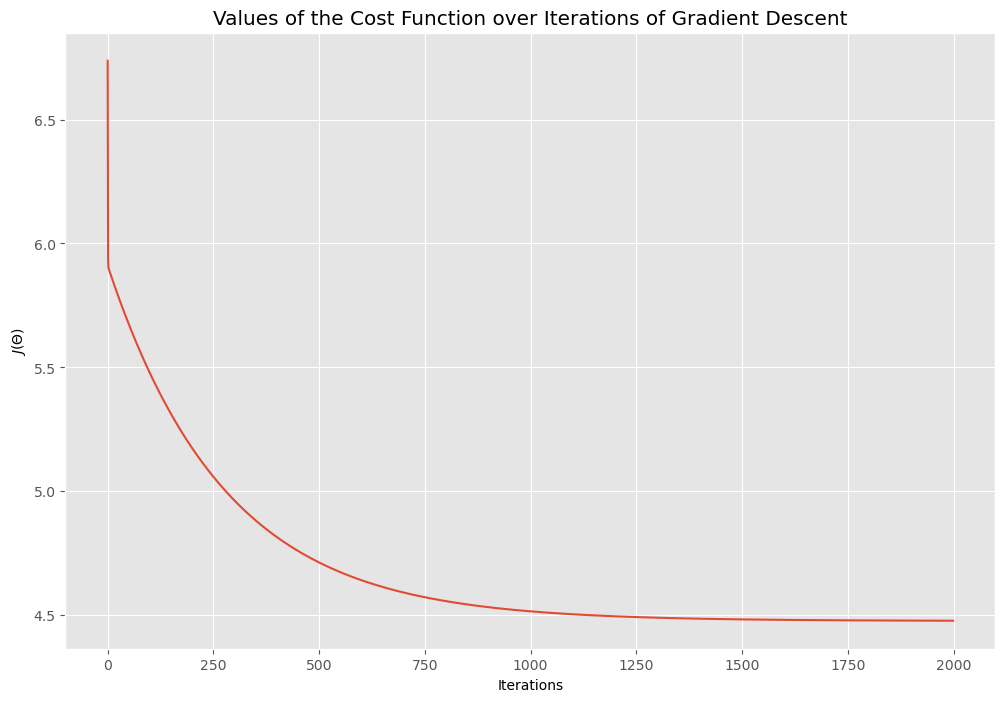

In [68]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

# output --> this is based on the learning rate 0.01 of alpha

Train the Data with Linear Regression Fit

In [70]:
print(theta.shape)
print(theta)

# output --> we need to squeeze the other dimension

(2, 1)
[[-3.78806857]
 [ 1.18221277]]


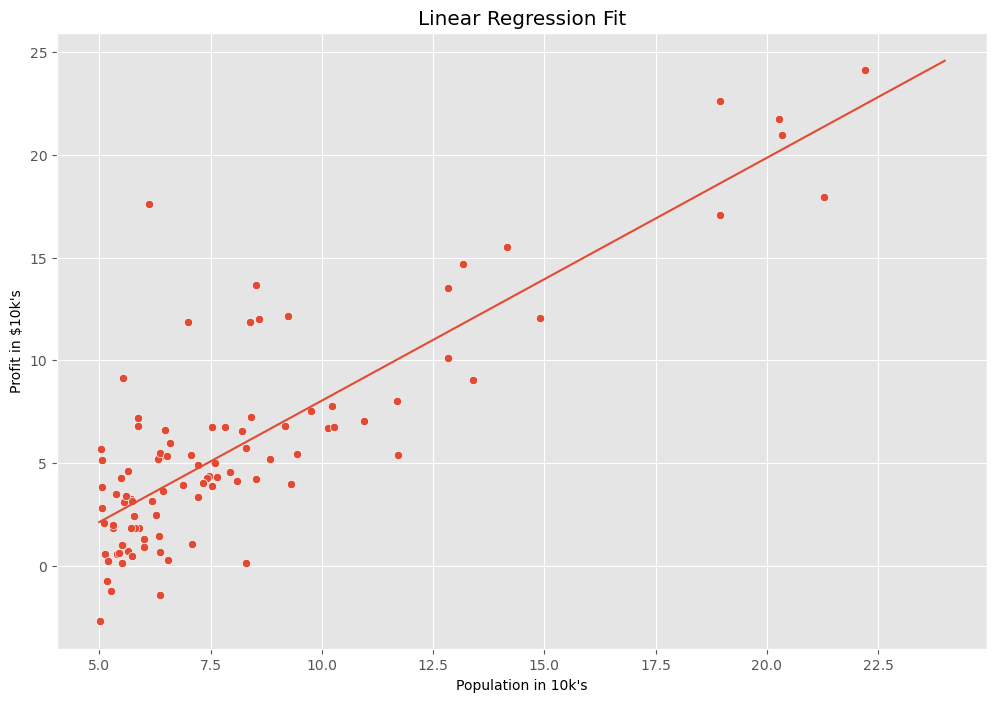

In [73]:
theta = np.squeeze(theta)

sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5, 25)] # it's 5, 25 because 'Population' on the original scatter was in that range
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x = x_value,y = y_value)

plt.xlabel("Population in 10k\'s")
plt.ylabel("Profit in $10k\'s")
plt.title("Linear Regression Fit");

# output --> this line is the line of best fit, learned by our model. We can now extrapolate values outside of what the model 
# has seen before, for example taking a population of 500k and predicting the profit

Inference using the optimized θ values

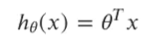
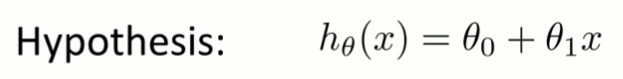

In [74]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [75]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1)))

For a population of 40,000 people, the model predicts a profit of $9408


In [76]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2)))

For a population of 83,000 people, the model predicts a profit of $60243


To conclude, the analysis began with the utilization of imported bike sharing data for the purpose of conducting univariate linear regression. Initial insights into the correlations between city population, profit from bike sharing were gained through data visualization on a scatterplot. Departing from the convenience of pre-existing libraries and functions, a hands-on approach was adopted. This involved the manual development of a cost function and a gradient descent algorithm, shedding light on the fundamental mechanisms underlying commonly employed practical methodologies.

Additionally, the investigation encompassed the generation and examination of a three-dimensional plot illustrating the behavior of the cost function. This visualization portrayed the dynamic alterations in response to variations in theta 0 and theta 1, ultimately revealing a bowl-shaped structure indicative of a global minimum. This indicated that the optimal values for theta zero and theta one are ~ -7.0 and 0.9. The trajectory of convergence spanning 2000 iterations was graphed, illustrating a consistent reduction in the cost function with each successive iteration. Notably, stability was attained at approximately 4.5 around the 1,000th iteration.

The endeavor culminated in the creation of a linear regression line of optimal fit. Leveraging this line, predictions were extrapolated for unseen population data, thereby enabling profit forecasts.